In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
dataset=pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [20]:
#shape of the dataset
dataset.shape

(1156, 7)

In [22]:
#finding null values and datatypes and other info related to the data set
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [23]:
#max null values are in purpose so filling them with NOT
dataset['PURPOSE'].fillna("NOT", inplace=True)

In [24]:
#changing start_date and end date to date-time format
dataset['START_DATE']=pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE']=pd.to_datetime(dataset['END_DATE'], errors='coerce')

In [25]:
#coverting the start_date and grouping them into four different categories i.e: Morning, afternoon, evening and night
from datetime import datetime
dataset['date']=pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time']=pd.DatetimeIndex(dataset['START_DATE']).hour
#categorising
dataset['day-night']=pd.cut(x=dataset['time'],
bins=[0,10,15,19,24],
labels=['Morning','Afternoon','Evening','Night'])

In [26]:
#dropping the rows with null values
dataset.dropna(inplace=True)

In [27]:
#dropping duplicate rows
dataset.drop_duplicates(inplace=True)

## DATA VISUALIZATION

In [28]:
#unique values of dataset
obj=(dataset.dtypes == 'object')
object_cols=list(obj[obj].index)

unique_values={}
for col in object_cols:
    unique_values[col] = dataset[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 175, 'STOP': 186, 'PURPOSE': 11, 'date': 291}

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

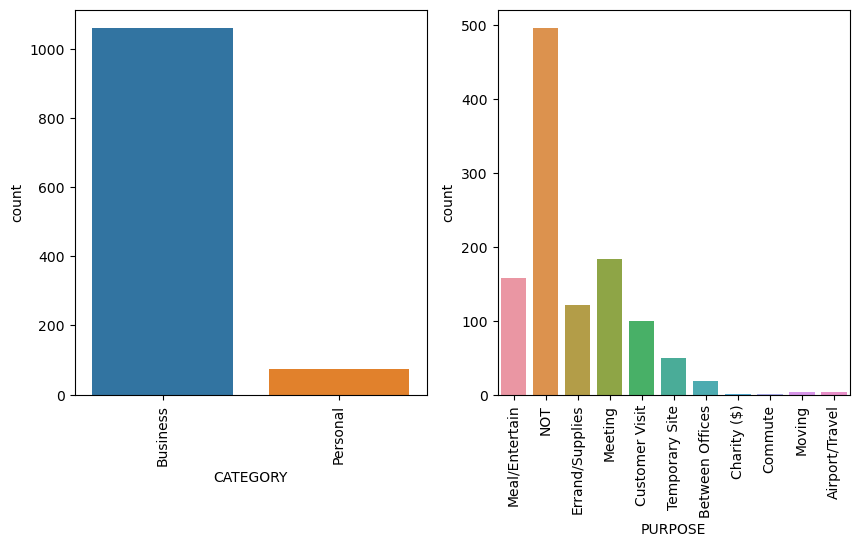

In [29]:
#bargraph for category
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x=dataset['CATEGORY'])
plt.xticks(rotation=90)
 
plt.subplot(1,2,2)
sns.countplot(x=dataset['PURPOSE'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

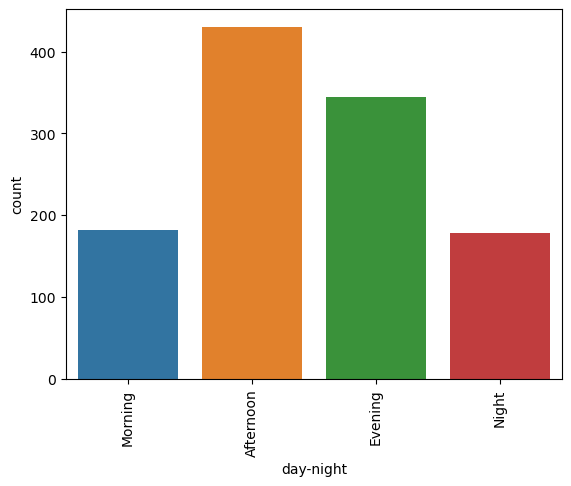

In [12]:
#bargraph for day-time
sns.countplot(x=dataset['day-night'])
plt.xticks(rotation=90)


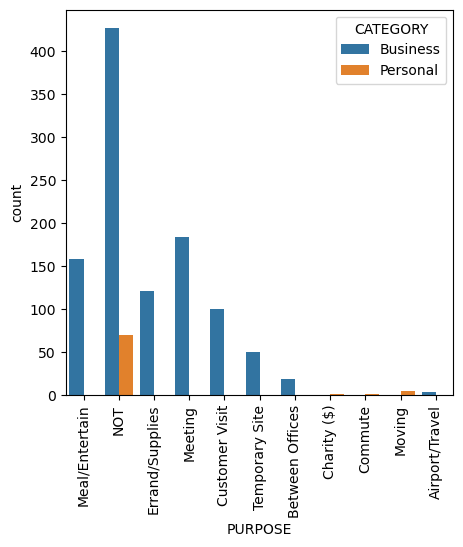

In [30]:
#comparision of category with purpose
plt.figure(figsize=(5,5))
sns.countplot(data=dataset, x='PURPOSE' , hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

>most of the rides are booked for business purpose
>highest cab bookings are recorded in the time period 10am-5pm
>In purpose meetings and meal/entertainment are high

In [14]:
#onehotencoder over CATEGORY and PURPOSE
from sklearn.preprocessing import OneHotEncoder
object_cols=['CATEGORY','PURPOSE']
OH_encoder=OneHotEncoder(sparse=False)
OH_cols=pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index=dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final=dataset.drop(object_cols, axis=1)
dataset=pd.concat([df_final,OH_cols],axis=1)

C:\Users\H P\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


C:\Users\H P\AppData\Local\Temp\ipykernel_17588\3737682705.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


<Axes: >

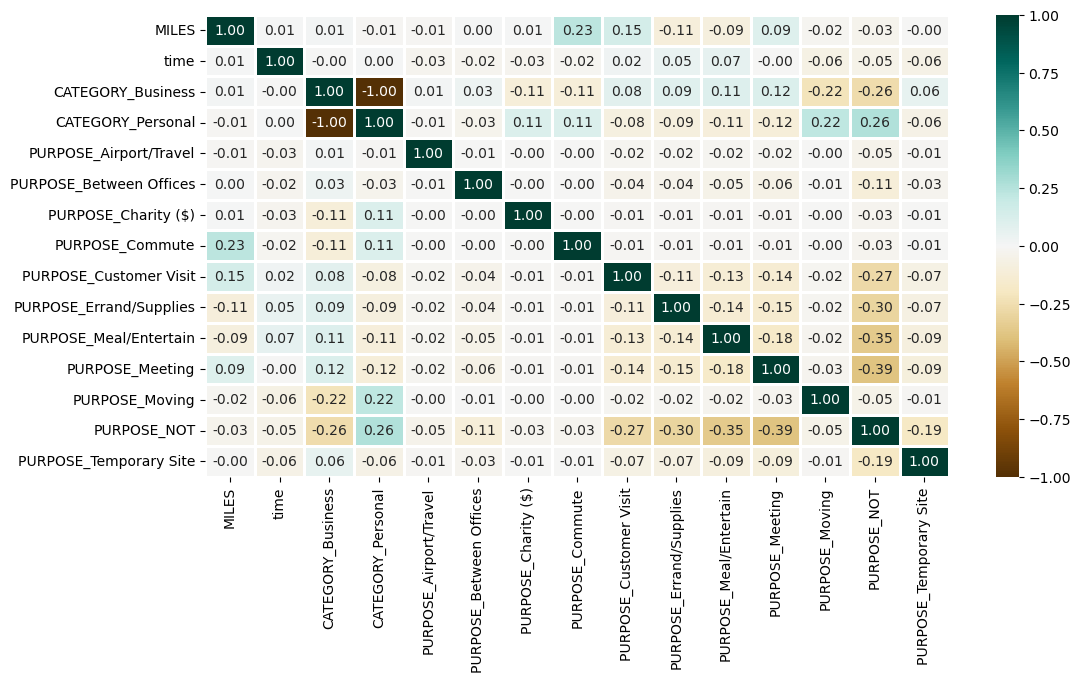

In [15]:
#correlation
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

Highly negative correlation - Business & personal

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

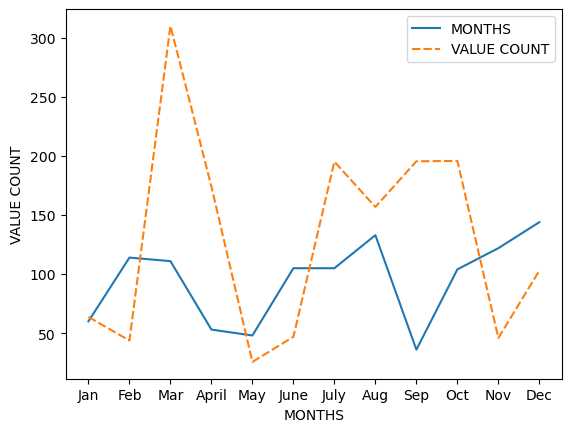

In [16]:
#visualizing data month wise
dataset['MONTH']=pd.DatetimeIndex(dataset['START_DATE']).month
month_label={1.0:'Jan', 2.0:'Feb', 3.0:'Mar', 4.0:'April', 5.0:'May', 6.0:'June', 7.0:'July', 8.0:'Aug', 9.0:'Sep', 10.0:'Oct', 11.0:'Nov', 12.0:'Dec'}
dataset["MONTH"]=dataset.MONTH.map(month_label)

mon=dataset.MONTH.value_counts(sort=False)

#total rides in a month count vs max ride of month max count
df=pd.DataFrame({"MONTHS":mon.values, "VALUE COUNT":dataset.groupby('MONTH', sort=False)['MILES'].max()})

                
p=sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

Value counts are less during the months Jan, Nov and Dec. Reason being winters in US

In [19]:
#data visualization for days in week
dataset['DAY']=dataset.START_DATE.dt.weekday
day_label={0:'Mon', 1:'Tues', 2:'Wed', 3:'Thus', 4:'Fri', 5:'Sat', 6:'Sun'}
dataset['DAY']=dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

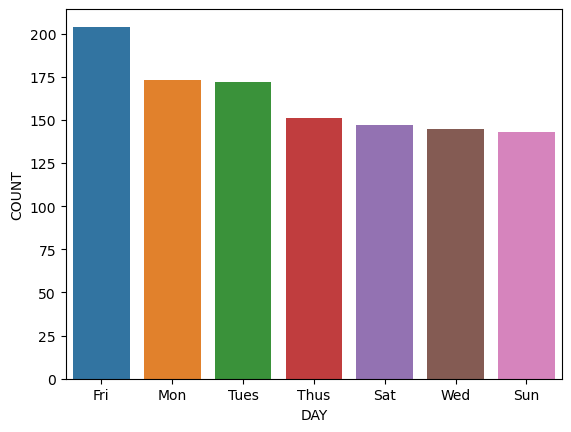

In [20]:
day_label=dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

maximum bookings are done on fridays

<Axes: >

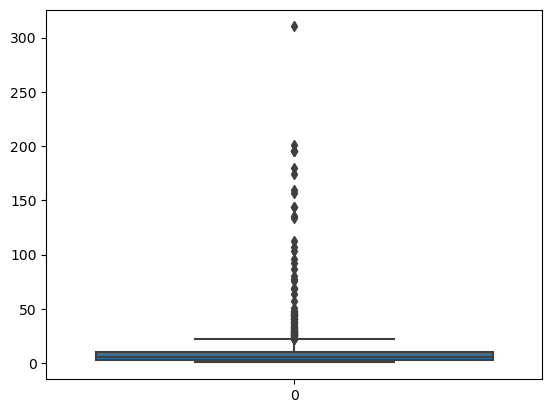

In [21]:
#distribution of the column
sns.boxplot(dataset['MILES'])

<Axes: >

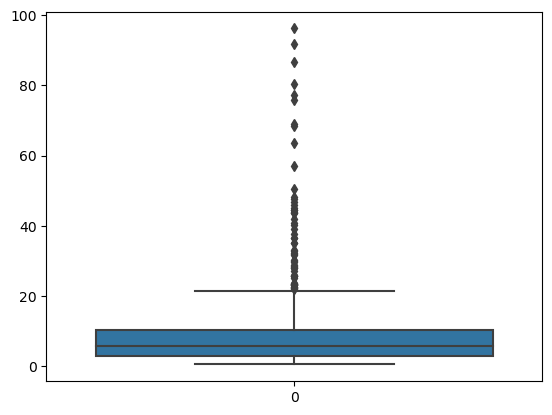

In [22]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

C:\Users\H P\AppData\Local\Temp\ipykernel_8768\1678554178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

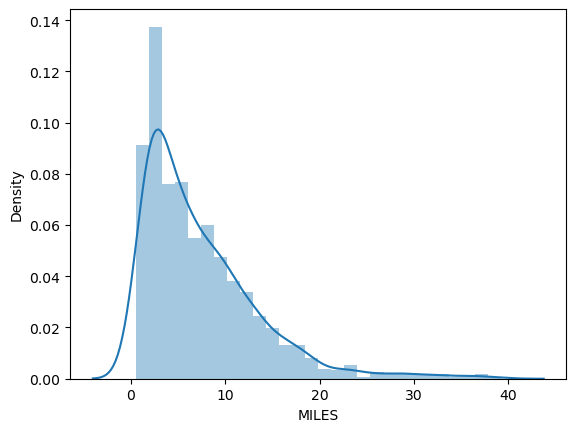

In [23]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])

Mostly booked for 4-5miles of distance
distance more than 20 miles can be treated as negligible. 